In [1]:
import nest
import matplotlib.pyplot as plt
from model.network import Network
import random


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Jul 22 2023 00:00:00

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Reset Kernel
nest.ResetKernel()
nest.update_time_limit = 10.

In [10]:
help(set)

Help on class set in module builtins:

class set(object)
 |  set() -> new empty set object
 |  set(iterable) -> new set object
 |
 |  Build an unordered collection of unique elements.
 |
 |  Methods defined here:
 |
 |  __and__(self, value, /)
 |      Return self&value.
 |
 |  __contains__(...)
 |      x.__contains__(y) <==> y in x.
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __iand__(self, value, /)
 |      Return self&=value.
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __ior__(self, value, /)
 |      Return self|=value.
 |
 |  __isub__(self, value, /)
 |      Return self-=value.
 |
 |  __iter__(self, /)
 |      Implement iter(self).
 |
 |  __ixor__(self, value, /)
 |      Return self^=value.
 |
 |  __l

In [3]:
# Instantiate network
net = Network(9)

In [4]:
# Connect multimeter and spike recorder to all populations
net.connect_all_devices()

In [5]:
# Generate random feature vector
vector_length = 324
non_zero_elements = 81

# Create a binary vector with all elements set to 0
binary_vector_one = [0] * vector_length

# Set 81 randomly chosen positions to 1
positions_to_set = random.sample(range(vector_length), non_zero_elements)
for position in positions_to_set:
    binary_vector_one[position] = 1

print("Binary Vector:", binary_vector_one)

Binary Vector: [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [6]:
# Input training signal to the network
net.create_input_train_signal(time_id=0, feature_vector=binary_vector_one)

Training signal successfully created.
Connecting input to the tc population...
... training signal successfully connected to the tc population.


In [7]:
# Run simulation
nest.Simulate(300.0)


Jan 29 20:02:57 NodeManager::prepare_nodes [Info]: 
    Preparing 913 nodes for simulation.

Jan 29 20:02:57 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 913
    Simulation time (ms): 300
    Number of OpenMP threads: 1
    Not using MPI

Jan 29 20:03:34 SimulationManager::update [Error]: 
    Update time limit exceeded.


NESTErrors.KernelException: KernelException in SLI function Simulate_d: 

In [ ]:
# Generate random feature vector
vector_length = 324
non_zero_elements = 81

# Create a binary vector with all elements set to 0
binary_vector_two = [0] * vector_length

# Set 81 randomly chosen positions to 1
positions_to_set = random.sample(range(vector_length), non_zero_elements)
for position in positions_to_set:
    binary_vector_two[position] = 1

print("Binary Vector:", binary_vector_two)

Binary Vector: [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]


In [ ]:
# Input training signal to the network
net.create_input_train_signal(time_id=2, feature_vector=binary_vector_two)

Training signal successfully created.
Connecting input to the tc population...
... training signal successfully connected to the tc population.


In [ ]:
# Run simulation
nest.Simulate(300.0)


Jan 29 19:59:32 NodeManager::prepare_nodes [Info]: 
    Preparing 914 nodes for simulation.

Jan 29 19:59:32 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 914
    Simulation time (ms): 250
    Number of OpenMP threads: 1
    Not using MPI

Jan 29 19:59:33 SimulationManager::run [Info]: 
    Simulation finished.


In [ ]:
# Get events from multimeter
tc_vm = net.mult_tc.get()
vm_tc = tc_vm["events"]["V_m"]
ts_vm_tc = tc_vm["events"]["times"]

# Get events from spike recorder
tc_spike = net.spikes_tc.get("events")
send_tc = tc_spike["senders"]
ts_spike_tc = tc_spike["times"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


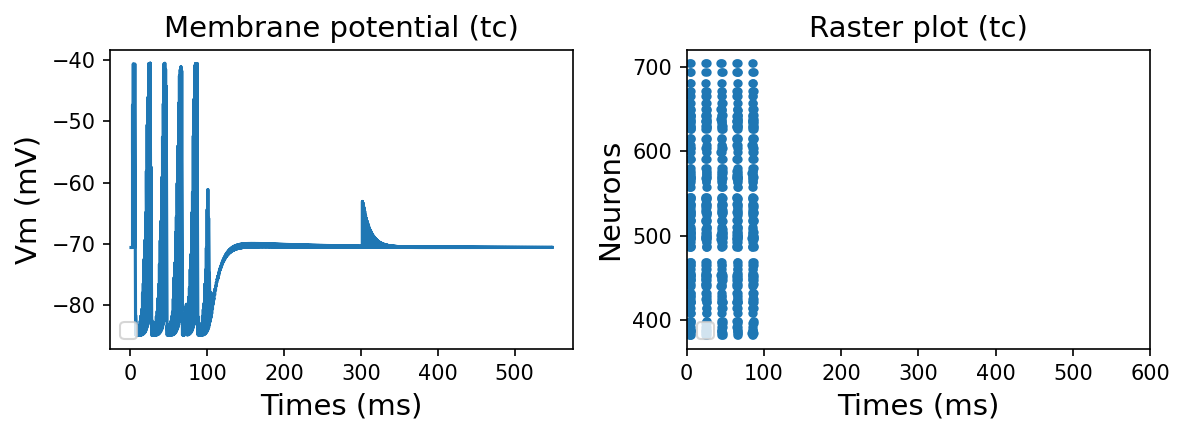

In [ ]:
# Plot results

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3), sharey=False)

axs[0].plot(ts_vm_tc, vm_tc)
axs[0].set_title('Membrane potential (tc)', size=14)
axs[0].legend(loc=3)
axs[0].set_xlabel("Times (ms)", size=14)
axs[0].set_ylabel("Vm (mV)", size=14)  # Fixed the ylabel, and "mV" is commonly used for millivolts

axs[1].plot(ts_spike_tc, send_tc, '.')
axs[1].set_title('Raster plot (tc)', size=14)
axs[1].legend(loc=3)
axs[1].set_xlabel("Times (ms)", size=14)
axs[1].set_xlim([0, 600.0])
axs[1].set_ylabel("Neurons", size=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplot
#sns.despine()
plt.show()

In [ ]:
id = nest.GetStatus(net.TC_POP[220], keys='global_id')[0]

In [ ]:
id

601